In [1]:
# Setup for Google Colab (optional)
import sys
if 'google.colab' in sys.modules:
    print("Running in Google Colab")
    # Install required packages
    !pip install -q py4DSTEM hyperspy scikit-image matplotlib numpy scipy
    
    # Clone the repository to access data
    !git clone -q https://github.com/NU-MSE-LECTURES/465-WINTER2026.git
    import os
    os.chdir('/content/465-WINTER2026')
    
    # Set up file handling
    from google.colab import files
    print("Colab setup complete!")
else:
    print("Running in local environment")

Running in local environment


<a href="https://colab.research.google.com/github/NU-MSE-LECTURES/465-WINTER2026/blob/main/Week_02/assignments/assignment_02_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 02: 4D-STEM Foundations

Complete this assignment to demonstrate your understanding of 4D-STEM data analysis and calibration.


## Task 1: Distinguish Navigation vs. Signal Axes

In your notebook, define the "Navigation Axes" (where the measurement is made, e.g., x, y scan positions).

Define the "Signal Axes" (what is measured at each point, e.g., an EELS spectrum or a 2D diffraction pattern).

Use signal.axes manager to print and verify the dimensionality of a 4D-STEM dataset (expected: 2 Navigation, 2 Signal).

#### Notes: 
- Navigation axes: these describe where the data is measured. For a 4D-STEM dataset, this is typically the scan positions on the sample itself (x,y)
- Signal axes: these describe what is measured at each point. For 4D-STEM, this is usually the diffraction pattern, so 2D (kx, ky) at each scan position. 

In [101]:
import py4DSTEM
import hyperspy.api as hs

# Verify libraries
print("All libraries imported successfully!")

print(f"py4DSTEM version: {py4DSTEM.__version__}")
print(f"HyperSpy version: {hs.__version__}")

All libraries imported successfully!
py4DSTEM version: 0.14.16
HyperSpy version: 2.3.0


In [102]:
# Load dataset as HyperSpy signal
signal = hs.load("Si-SiGe.dm4")

# Inspect navigation and signal axes of dataset
print(signal.axes_manager)

<Axes manager, axes: (448, 480|17, 77)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               z |    448 |      0 |       0 |   0.062 |   1/nm 
     <undefined> |    480 |      0 |       0 |   0.062 |   1/nm 
---------------- | ------ | ------ | ------- | ------- | ------ 
               x |     17 |      0 |       0 |       2 |     nm 
               y |     77 |      0 |       0 |       2 |     nm 


In [103]:
# (Re-)Define navigation and signal axes
signal.axes_manager.navigation_axes[0].name = "Rx" # real-space, horizontal axis
signal.axes_manager.navigation_axes[1].name = "Ry" # real-space, vertical axis

signal.axes_manager.signal_axes[0].name = "Qx" # reciprocal-space, horizontal axis
signal.axes_manager.signal_axes[1].name = "Qy" # reciprocal-space, vertical axis

# Verify updated navigation and signal axes
print(signal.axes_manager)

<Axes manager, axes: (448, 480|17, 77)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
              Rx |    448 |      0 |       0 |   0.062 |   1/nm 
              Ry |    480 |      0 |       0 |   0.062 |   1/nm 
---------------- | ------ | ------ | ------- | ------- | ------ 
              Qx |     17 |      0 |       0 |       2 |     nm 
              Qy |     77 |      0 |       0 |       2 |     nm 


In [104]:
# Verify dimensionality of the 4D-STEM dataset
print("Navigation dimensions:", signal.axes_manager.navigation_dimension)
print("Signal dimensions:", signal.axes_manager.signal_dimension)

Navigation dimensions: 2
Signal dimensions: 2


## Task 2: Load and Calibrate 4D-STEM Data

Use py4DSTEM.io.read to load a 4D-STEM dataset (e.g., .dm4 or .h5).

**Note:** The dataset Si-SiGe.dm4 should be available in the raw_data folder.

Set the scan step size (real space calibration) using dataset.set_scan_step_size().

Perform Center of Mass (CoM) correction using dataset.get_diffraction_shifts() to center the unscattered beam.

In [105]:
# Load as 4D-STEM dataset
filepath = "Si-SiGe.dm4"
dataset = py4DSTEM.io.import_file(filepath)

print("Dataset successfully loaded!")

# Load calibration dataset
filepath_calib = "Diffraction Si_Au_Calib.dm4"
dataset_calib = py4DSTEM.io.import_file(filepath_calib)

print("Calibration dataset successfully loaded!")

Dataset successfully loaded!
Calibration dataset successfully loaded!


In [106]:
# Inspect experimental dataset
print(type(dataset))
print("Dataset shape:", dataset.data.shape)
print(dataset.calibration)

# Inspect calibration dataset
print(type(dataset_calib))
print("Dataset shape:", dataset_calib.data.shape)
print(dataset_calib.calibration)

<class 'py4DSTEM.datacube.datacube.DataCube'>
Dataset shape: (480, 448, 77, 17)
Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:    1
             R_pixel_size:    1
             Q_pixel_units:   pixels
             R_pixel_units:   pixels
             QR_flip:         False
)
<class 'py4DSTEM.datacube.datacube.DataCube'>
Dataset shape: (20, 20, 256, 256)
Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:    0.026740015
             R_pixel_size:    0.0020393706
             Q_pixel_units:   A^-1
             R_pixel_units:   µm
             QR_flip:         False
)


In [107]:
# Set scan step size of experimental dataset using settings from calibration dataset
scan_step_size = 2.0393706 # nm 
reciprocal_step_size = 0.026740015 # A^-1

dataset.calibration.set_R_pixel_size(scan_step_size)
dataset.calibration.set_R_pixel_units("nm")
dataset.calibration.set_Q_pixel_size(reciprocal_step_size)
dataset.calibration.set_Q_pixel_units("A^-1")

# Verify new scan step size of experimental dataset
print("Scan step size set!")
print("(Verify) Calibrated dataset:", dataset.calibration)

Scan step size set!
(Verify) Calibrated dataset: Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:    0.026740015
             R_pixel_size:    2.0393706
             Q_pixel_units:   A^-1
             R_pixel_units:   nm
             QR_flip:         False
)


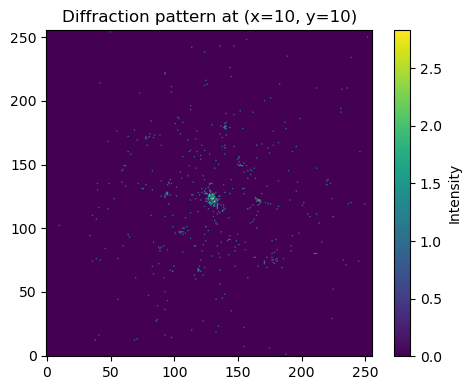

Calibration CoM: (130.16, 124.53)


In [108]:
# ----------------------------------------------- #
# Validate CoM correction on calibration dataset #
# ----------------------------------------------- #
import matplotlib.pyplot as plt
import numpy as np

# Choose representative scan position from calibration dataset
Rx0_calib = dataset_calib.data.shape[0] // 2
Ry0_calib = dataset_calib.data.shape[1] // 2

dp_calib = dataset_calib.data[Rx0_calib, Ry0_calib].astype(float)
plt.figure(figsize=(5, 4))
plt.imshow(np.sqrt(dp_calib), origin="lower") # sqrt to enhance contrast
plt.colorbar(label="Intensity")
plt.title(f"Diffraction pattern at (x={Rx0_calib}, y={Ry0_calib})")
plt.tight_layout()
plt.show()

# Average diffraction pattern over scan positions
dp_calib_avg = dataset_calib.data.mean(axis=(0, 1)).astype(float)

qy = np.arange(dp_calib_avg.shape[0])
qx = np.arange(dp_calib_avg.shape[1])
QX, QY = np.meshgrid(qx, qy)

I = dp_calib_avg.sum()
qx_calib = (QX * dp_calib_avg).sum() / I
qy_calib = (QY * dp_calib_avg).sum() / I

print(f"Calibration CoM: ({qx_calib:.2f}, {qy_calib:.2f})")

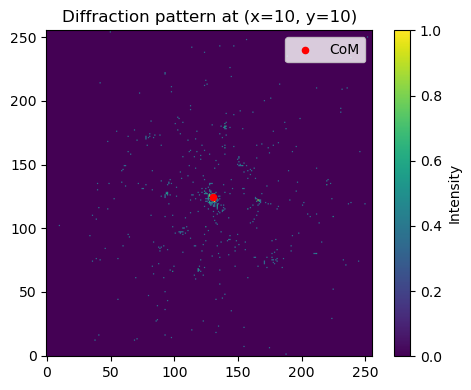

In [109]:
# Visualize CoM on diffraction pattern
plt.figure(figsize=(5, 4))
plt.imshow(np.sqrt(dp_calib), origin="lower") # sqrt to enhance contrast

com_x_calib = 130.16 # Geometric center at 128
com_y_calib = 124.53 # Geometric center at 128
plt.scatter(com_x_calib, com_y_calib, color='red',zorder=10, s=20, label='CoM')

plt.colorbar(label="Intensity")
plt.title(f"Diffraction pattern at (x={Rx0_calib}, y={Ry0_calib})")
plt.legend()
plt.tight_layout()
plt.show()

Using scan position: (240, 224)


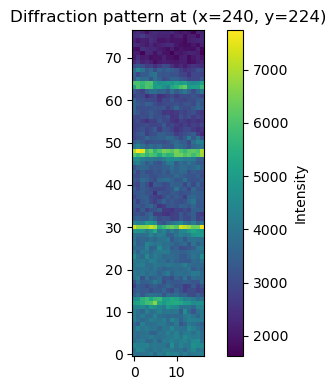

Experimental CoM: (7.93, 35.34)


In [110]:
# ----------------------------------------------- #
# Perform CoM correction on experimental dataset #
# ----------------------------------------------- #

# Choose representative scan position for experimental data
Rx0 = dataset.data.shape[0] // 2
Ry0 = dataset.data.shape[1] // 2

print("Using scan position:", (Rx0, Ry0))
dp = dataset.data[Rx0, Ry0].astype(float)

plt.figure(figsize=(5, 4))
plt.imshow(dp, origin="lower")
plt.colorbar(label="Intensity")
plt.title(f"Diffraction pattern at (x={Rx0}, y={Ry0})")
plt.tight_layout()
plt.show()

# Compute CoM from selected scan position
Qy, Qx = dp.shape 

qy = np.arange(Qy)[:, None]   # vertical
qx = np.arange(Qx)[None, :]   # horizontal

I = dp.sum()

qx_exp = (qx * dp).sum() / I
qy_exp = (qy * dp).sum() / I

print(f"Experimental CoM: ({qx_exp:.2f}, {qy_exp:.2f})")

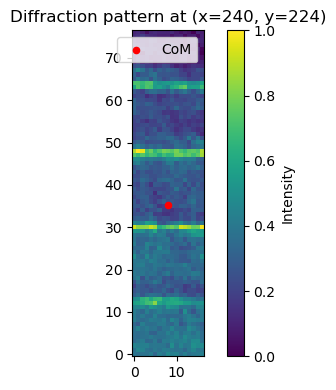

In [111]:
# Visualize CoM on diffraction pattern
plt.figure(figsize=(5, 4))
plt.imshow(dp, origin="lower")

com_x = 7.93 # Geometric center at 8.5
com_y = 35.34 # Geometric center at 38.5
plt.scatter(com_x, com_y, color='red',zorder=10, s=20, label='CoM')

plt.colorbar(label="Intensity")
plt.title(f"Diffraction pattern at (x={Rx0}, y={Ry0})")
plt.legend()
plt.tight_layout()
plt.show()

In [112]:
# Define CoM correction
Qy, Qx = dp.shape

print("Dataset shape:", dataset.data.shape)

qx_com = 7.93
qy_com = 35.34

qx_target = (Qx - 1) / 2 # Geometric center
qy_target = (Qy - 1) / 2 # Geometric center

print("Geometric center:", qx_target, qy_target)

dx = qx_target - qx_com # Shift along the Qx axis
dy = qy_target - qy_com # Shift along the Qy axis

print(f"Applying CoM shifts: dx = {dx:.2f}, dy = {dy:.2f}")

Dataset shape: (480, 448, 77, 17)
Geometric center: 8.0 38.0
Applying CoM shifts: dx = 0.07, dy = 2.66


In [113]:
from scipy.ndimage import shift
import numpy as np

Ry, Rx, Qy, Qx = dataset.data.shape

corrected_data = np.zeros(dataset.data.shape, dtype=float)

for iy in range(Ry):
    for ix in range(Rx):

        dp = dataset.data[iy, ix].astype(float)  # shape (Qy, Qx)

        dp_shifted = shift(
            dp,
            shift=(dy, dx),
            order=1,
            mode="nearest"
        )

        corrected_data[iy, ix] = dp_shifted

print("CoM correction successfully applied to full dataset!")

CoM correction successfully applied to full dataset!


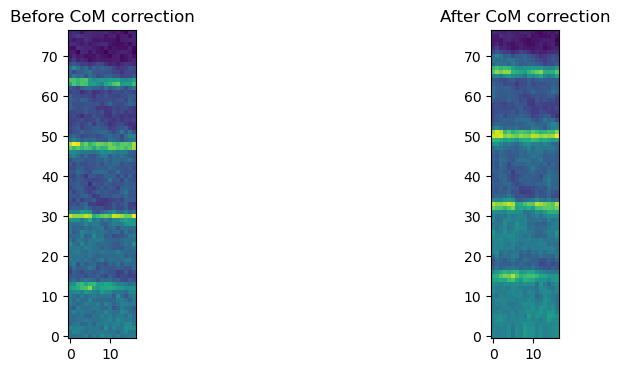

In [114]:
# Visual verification of CoM correction
iy = Ry // 2
ix = Rx // 2

dp_before = dataset.data[iy, ix]
dp_after = corrected_data[iy, ix]

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(dp_before, origin="lower")
plt.title("Before CoM correction")

plt.subplot(1,2,2)
plt.imshow(dp_after, origin="lower")
plt.title("After CoM correction")

plt.show()

In [115]:
# Numerical verification of corrected data
dp_corr = corrected_data[iy, ix]

qy = np.arange(Qy)[:, None]
qx = np.arange(Qx)[None, :]

I = dp_corr.sum()
qx_corr = (qx * dp_corr).sum() / I
qy_corr = (qy * dp_corr).sum() / I

print("Corrected CoM:", qx_corr, qy_corr)
print("Target center:", (Qx - 1)/2, (Qy - 1)/2)

Corrected CoM: 7.941510045650514 35.74999557110951
Target center: 8.0 38.0


## Task 3: Virtual Detector Reconstruction

Generate a Virtual Bright Field (BF) image by integrating the central transmitted disk.

Generate an Annular Dark Field (ADF) image by integrating the scattered electrons in an outer ring.

Compare the Z-contrast in the ADF image to the diffraction contrast in the BF image.

#### Notes: 
- Bright Field (BF): sensitive to diffraction contrast, strain, crystal orientation; contrast arises from redistribution of intensity; not monotonic with atomic number
- Annular Dark Field (ADF): sensitive to high-angle scattering; produces a Z-contrast that scales with intensity

In [116]:
# Define reciprocal-space coordinates
Ry, Rx, Qy, Qx = corrected_data.shape

qy = np.arange(Qy)[:, None]
qx = np.arange(Qx)[None, :]

qy0 = (Qy - 1) / 2
qx0 = (Qx - 1) / 2

qr = np.sqrt((qy - qy0)**2 + (qx - qx0)**2) # Radius map in reciprocal space

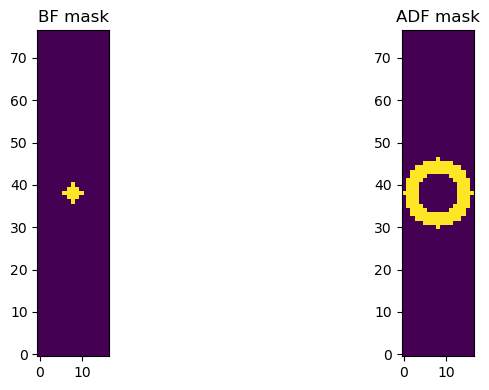

In [117]:
# Define BF and ADF mask (radii arbitrarily chosen)
r_bf = 2.0 
bf_mask = qr <= r_bf

r_adf_inner = 5.0
r_adf_outer = 8.0

adf_mask = (qr >= r_adf_inner) & (qr <= r_adf_outer)

# Visualize masks
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(bf_mask, origin="lower")
plt.title("BF mask")

plt.subplot(1,2,2)
plt.imshow(adf_mask, origin="lower")
plt.title("ADF mask")

plt.tight_layout()
plt.show()

In [118]:
# Compute BF and ADF images
BF = np.zeros((Ry, Rx))
ADF = np.zeros((Ry, Rx))

for iy in range(Ry):
    for ix in range(Rx):
        dp = corrected_data[iy, ix]

        BF[iy, ix] = np.sum(dp[bf_mask])
        ADF[iy, ix] = np.sum(dp[adf_mask])

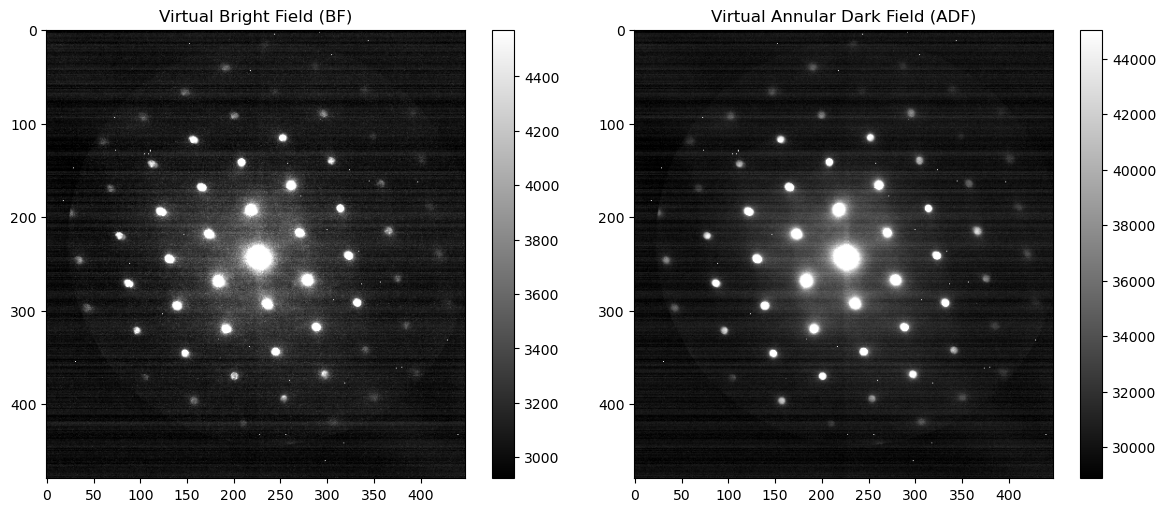

In [119]:
# Plot the results with percentile-based contrast scaling
plt.figure(figsize=(12,5))

bf_vmin, bf_vmax = np.percentile(BF, [1, 99])
adf_vmin, adf_vmax = np.percentile(ADF, [1, 99])

plt.subplot(1,2,1)
plt.imshow(BF, cmap="gray", vmin=bf_vmin, vmax=bf_vmax)
plt.title("Virtual Bright Field (BF)")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(ADF, cmap="gray", vmin=adf_vmin, vmax=adf_vmax)
plt.title("Virtual Annular Dark Field (ADF)")
plt.colorbar()

plt.tight_layout()
plt.show()

In [120]:
print("BF shape:", BF.shape)
print("ADF shape:", ADF.shape)
print("BF min/max:", BF.min(), BF.max())
print("ADF min/max:", ADF.min(), ADF.max())

BF shape: (480, 448)
ADF shape: (480, 448)
BF min/max: 2780.6372 389174.95980000007
ADF min/max: 27717.2282 3658845.2766000004


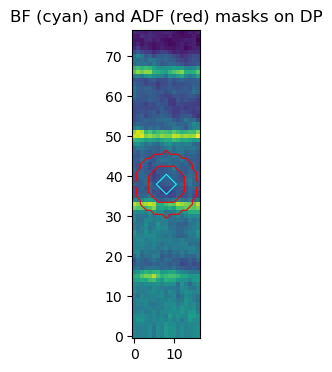

In [121]:
iy, ix = 240, 224  # same position you used before
dp = corrected_data[iy, ix]

plt.figure(figsize=(5,4))
plt.imshow(dp, origin="lower")
plt.contour(bf_mask, colors="cyan", linewidths=0.8)
plt.contour(adf_mask, colors="red", linewidths=0.8)
plt.title("BF (cyan) and ADF (red) masks on DP")

plt.show()

## Task 4: Basic 4D-STEM Visualization

Launch the interactive 4D-STEM browser using dataset.show() (if using a local GUI) or py4D.show_image().

Export a publication-quality figure of a virtual ADF image with a scale bar and a perceptually uniform colormap (e.g., magma).

In [ ]:
# Your code here




from matplotlib.patches import Rectangle
if scale_bar_pixels < adf_image.shape[1] - 5:
    # Position scale bar in bottom-left corner
    bar_x, bar_y = 2, adf_image.shape[0] - 4
    scale_bar = Rectangle((bar_x, bar_y), scale_bar_pixels, 1, fill=True, color='white', linewidth=1)
    ax.add_patch(scale_bar)
    ax.text(bar_x + scale_bar_pixels/2, bar_y - 1, f'{scale_bar_length} nm', ha='center', va='top', 
            color='white', fontsize=10, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label('Integrated Intensity (a.u.)', fontsize=12)

plt.tight_layout()
plt.savefig('virtual_adf_figure_sisige.png', dpi=300, bbox_inches='tight')
plt.show()

## Task 5: Finalize and Submit

Update your README.md with a brief explanation of how virtual detectors allow post-acquisition imaging.

Push the completed Week 02 notebook to your GitHub repository.

Submit the repository link on Canvas.

## Notes
Virtual detectors are software-defined regions in a diffraction pattern that you can integrate over to form images. Because you record the full diffraction pattern at every probe position in a 4D-STEM experiment, you can choose any shape, size, or position of detector after the experiment -- this is called post-acquisition imaging.

- You can generate bright-field, dark-field, annular, or complex contrast images from the same dataset without changing the microscope.
- This flexibility allows you to extract multiple types of contrast (diffraction, Z-contrast, phase contrast) from a single scan

Essentially, the dataset contains all the scattering information, and virtual detectors let you "look at it" in whichever way you want after the experiment is done